### Table of Contents:
* [1. Feature selection and improve accuracy of data mining results ](#1)
* &emsp;[1.1. Importing Libraries](#11)
* &emsp;[1.2. Converting categorical data to numerical](#12)
* &emsp;[1.3. Correlation Matrix](#13)
* &emsp;[1.4. Heat-Map of correlation Matrix](#14)
* &emsp;[1.5. Relevant attributes to improve the accuracy of data mining results](#15)

# 1. Feature selection and improve accuracy of data mining results <a class="anchor" id="1"></a>

Select relevant attributes from your dataset to improve the accuracy of data mining results. 

## 1.1. Importing Libraries <a class="anchor" id="11"></a>

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Converting categorical data to numerical <a class="anchor" id="12"></a>

In [2]:
df = pd.read_csv('data/training_data.csv')

In [4]:
#categorical_features = ['company','country','director','genre','rating','released','star','year',
#                        'writer','original_title','overview','tagline','title','genres_edited',
#                        'spoken_languages_edited','production_countries_edited','keywords_edited']
continuous_features = ['budget','runtime','score','votes','popularity']
normalized_features = [e+'_norm' for e in continuous_features]
target_features = ['isprofit','profitability_ratio']
all_features = continuous_features + normalized_features + target_features

In [6]:
#df['company']=df['company'].astype('category').cat.codes
#df['country']=df['country'].astype('category').cat.codes
#df['director']=df['director'].astype('category').cat.codes
#df['genre']=df['genre'].astype('category').cat.codes
#df['rating']=df['rating'].astype('category').cat.codes
#df['star']=df['star'].astype('category').cat.codes
#df['writer']=df['writer'].astype('category').cat.codes

## 1.3. Correlation Matrix <a class="anchor" id="13"></a>

In [7]:
corr_df=df[all_features].corr()

In [8]:
corr_df

,budget,runtime,score,votes,popularity,budget_norm,runtime_norm,score_norm,votes_norm,popularity_norm,isprofit,profitability_ratio
budget,1.000000,0.251860,-0.112511,0.402381,0.357078,1.000000,0.251860,-0.112511,0.402381,0.357078,-0.071842,-0.120503
runtime,0.251860,1.000000,0.381564,0.200113,0.115461,0.251860,1.000000,0.381564,0.200113,0.115461,-0.038992,-0.048151
score,-0.112511,0.381564,1.000000,0.386960,0.183645,-0.112511,0.381564,1.000000,0.386960,0.183645,0.117046,0.121273
votes,0.402381,0.200113,0.386960,1.000000,0.512225,0.402381,0.200113,0.386960,1.000000,0.512225,0.274563,0.255542
popularity,0.357078,0.115461,0.183645,0.512225,1.000000,0.357078,0.115461,0.183645,0.512225,1.000000,0.177348,0.177170
budget_norm,1.000000,0.251860,-0.112511,0.402381,0.357078,1.000000,0.251860,-0.112511,0.402381,0.357078,-0.071842,-0.120503
runtime_norm,0.251860,1.000000,0.381564,0.200113,0.115461,0.251860,1.000000,0.381564,0.200113,0.115461,-0.038992,-0.048151
score_norm,-0.112511,0.381564,1.000000,0.386960,0.183645,-0.112511,0.381564,1.000000,0.386960,0.183645,0.117046,0.121273
votes_norm,0.402381,0.200113,0.386960,1.000000,0.512225,0.402381,0.200113,0.386960,1.000000,0.512225,0.274563,0.255542
popularity_norm,0.357078,0.115461,0.183645,0.512225,1.000000,0.357078,0.115461,0.183645,0.512225,1.000000,0.177348,0.177170


## 1.4. Heat-Map of correlation Matrix <a class="anchor" id="14"></a>

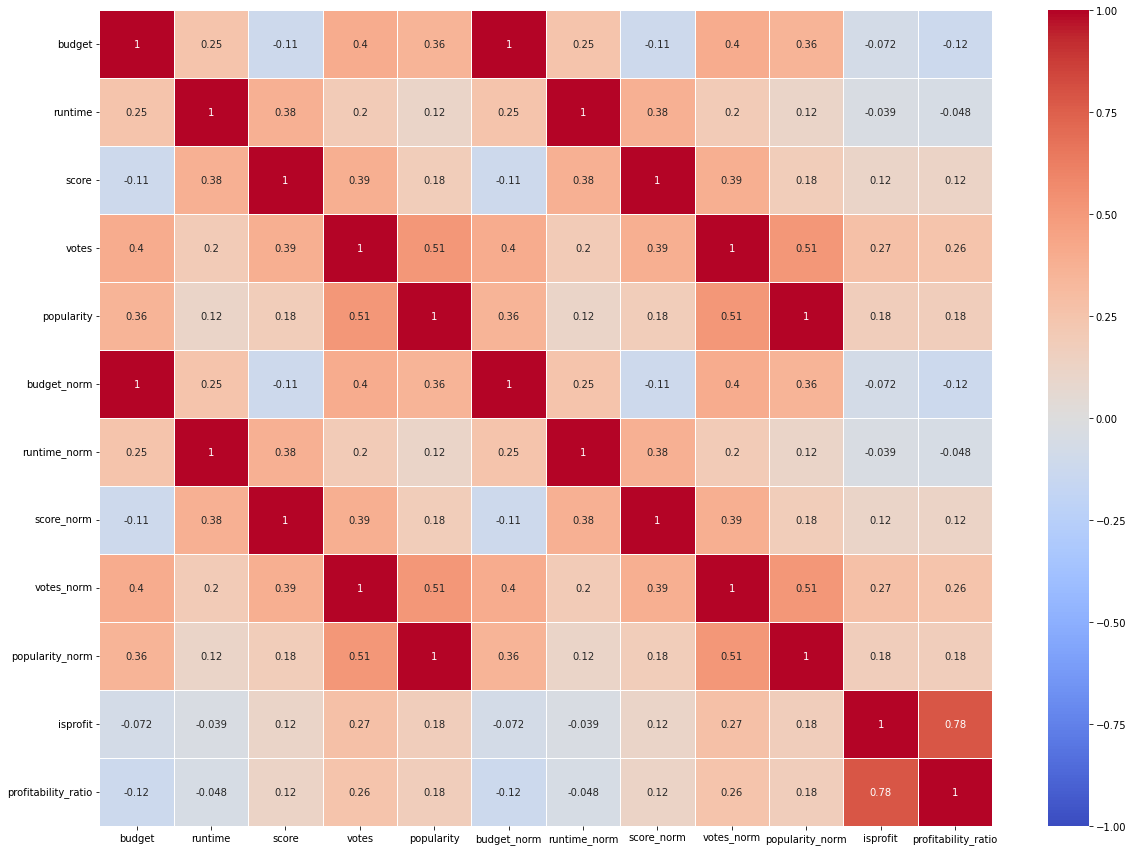

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_df,cmap='coolwarm',vmin=-1, vmax=1,annot=True,linewidth=.5);


## 1.5. Relevant attributes to improve the accuracy of data mining results <a class="anchor" id="15"></a>

In [10]:
corr_df_features = set()
for i in range(len(corr_df.columns)-2):
    if corr_df.iloc[i,10]<-0.04 or corr_df.iloc[i,10]>0.04 or \
        corr_df.iloc[i,11]<-0.04 or corr_df.iloc[i,11]>0.04:
        corr_df_features.add(corr_df.columns[i])

In [11]:
corr_df_features

{'budget',
 'budget_norm',
 'popularity',
 'popularity_norm',
 'runtime',
 'runtime_norm',
 'score',
 'score_norm',
 'votes',
 'votes_norm'}

In [12]:
df[list(corr_df_features)+['isprofit','profitability_ratio']].to_csv('data/final_training_data.csv')